In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 2. Load Dataset
file_path = "predictive_maintenance_dataset.csv"
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [3]:
# 3. Preprocessing
X = df.drop(columns=['date', 'device', 'failure'])
y = df['failure']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# 4. Train Isolation Forest
X_train = X_scaled[y == 0]
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train)

preds = iso_forest.predict(X_scaled)
pred_labels = np.where(preds == -1, 1, 0)


In [5]:
# 5. Evaluate Isolation Forest
precision = precision_score(y, pred_labels)
recall = recall_score(y, pred_labels)
f1 = f1_score(y, pred_labels)
acc = accuracy_score(y, pred_labels)
cm = confusion_matrix(y, pred_labels)

print("Isolation Forest Performance:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)


Isolation Forest Performance:
Precision: 0.0087
Recall: 0.5189
F1 Score: 0.0170
Accuracy: 0.9490
Confusion Matrix:
 [[118085   6303]
 [    51     55]]


In [7]:
# 6. Baseline: Rule-based Threshold Model
threshold = np.percentile(X['metric1'], 99.5)  # Top 0.5% of metric1 values
baseline_preds = np.where(X['metric1'] > threshold, 1, 0)

b_precision = precision_score(y, baseline_preds)
b_recall = recall_score(y, baseline_preds)
b_f1 = f1_score(y, baseline_preds)
b_acc = accuracy_score(y, baseline_preds)

print("Baseline Rule-Based Model:")
print(f"Precision: {b_precision:.4f}")
print(f"Recall: {b_recall:.4f}")
print(f"F1 Score: {b_f1:.4f}")
print(f"Accuracy: {b_acc:.4f}")


Baseline Rule-Based Model:
Precision: 0.0016
Recall: 0.0094
F1 Score: 0.0027
Accuracy: 0.9942


In [8]:
# 7. Accuracy Improvement
acc_improvement = ((acc - b_acc) / b_acc) * 100
print(f"Accuracy Improvement: {acc_improvement:.2f}%")


Accuracy Improvement: -4.55%


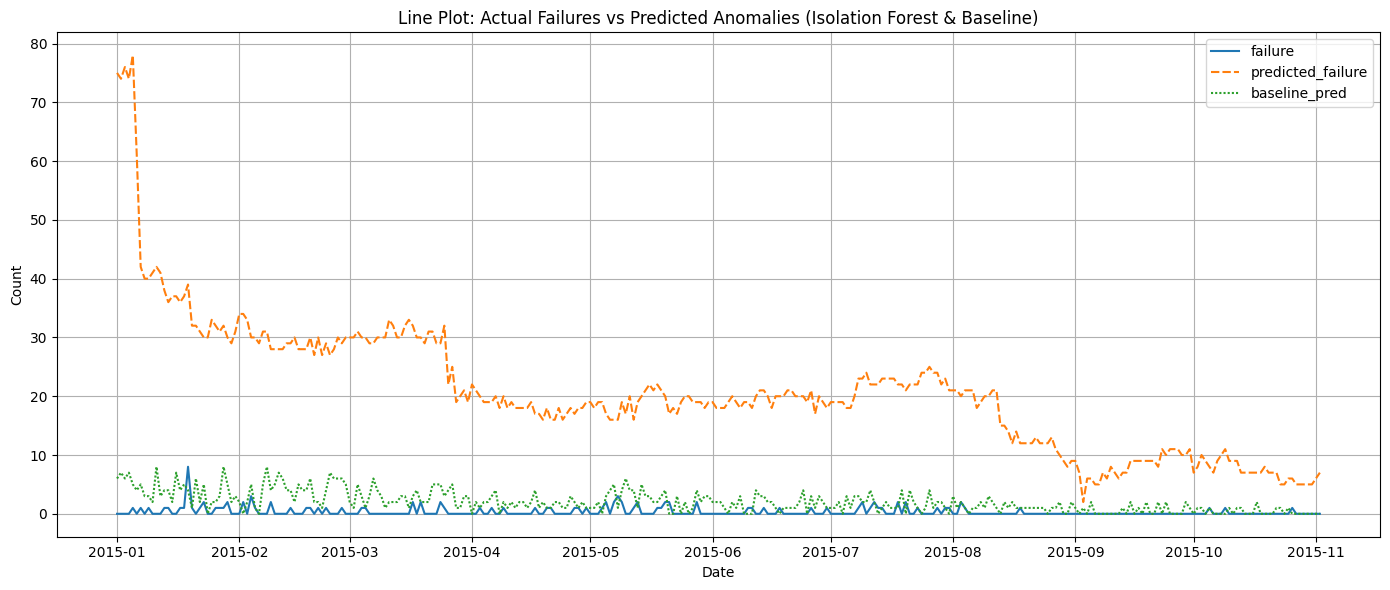

In [9]:
# 8. Visualize Trends with Line Plot
df['predicted_failure'] = pred_labels
df['baseline_pred'] = baseline_preds

daily = df.groupby('date')[['failure', 'predicted_failure', 'baseline_pred']].sum()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily)
plt.title('Line Plot: Actual Failures vs Predicted Anomalies (Isolation Forest & Baseline)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# --- Isolation Forest Metrics ---
print("🔍 Isolation Forest Performance Metrics")
iso_accuracy = accuracy_score(y, pred_labels)
iso_precision = precision_score(y, pred_labels)
iso_recall = recall_score(y, pred_labels)
iso_f1 = f1_score(y, pred_labels)
iso_cm = confusion_matrix(y, pred_labels)

print(f"Accuracy : {iso_accuracy:.4f}")
print(f"Precision: {iso_precision:.4f}")
print(f"Recall   : {iso_recall:.4f}")
print(f"F1 Score : {iso_f1:.4f}")
print("Confusion Matrix:")
print(iso_cm)
print("\nDetailed Report:")
print(classification_report(y, pred_labels, target_names=["Normal", "Failure"]))


# --- Baseline Rule-Based Metrics ---
print("\n🧪 Baseline Rule-Based Model Metrics")
base_accuracy = accuracy_score(y, baseline_preds)
base_precision = precision_score(y, baseline_preds)
base_recall = recall_score(y, baseline_preds)
base_f1 = f1_score(y, baseline_preds)
base_cm = confusion_matrix(y, baseline_preds)

print(f"Accuracy : {base_accuracy:.4f}")
print(f"Precision: {base_precision:.4f}")
print(f"Recall   : {base_recall:.4f}")
print(f"F1 Score : {base_f1:.4f}")
print("Confusion Matrix:")
print(base_cm)
print("\nDetailed Report:")
print(classification_report(y, baseline_preds, target_names=["Normal", "Failure"]))

# --- Accuracy Comparison ---
acc_improvement = ((iso_accuracy - base_accuracy) / base_accuracy) * 100
print(f"\n📊 Accuracy Improvement of Isolation Forest over Baseline: {acc_improvement:.2f}%")


🔍 Isolation Forest Performance Metrics
Accuracy : 0.9490
Precision: 0.0087
Recall   : 0.5189
F1 Score : 0.0170
Confusion Matrix:
[[118085   6303]
 [    51     55]]

Detailed Report:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97    124388
     Failure       0.01      0.52      0.02       106

    accuracy                           0.95    124494
   macro avg       0.50      0.73      0.50    124494
weighted avg       1.00      0.95      0.97    124494


🧪 Baseline Rule-Based Model Metrics
Accuracy : 0.9942
Precision: 0.0016
Recall   : 0.0094
F1 Score : 0.0027
Confusion Matrix:
[[123766    622]
 [   105      1]]

Detailed Report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00    124388
     Failure       0.00      0.01      0.00       106

    accuracy                           0.99    124494
   macro avg       0.50      0.50      0.50    124494
weighted avg       1.00      0.99      

In [11]:
import joblib

# Save the model to a file
joblib.dump(iso_forest, "isolation_forest_model.pkl")

# Save the scaler too, if you want consistent preprocessing later
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [12]:
# Load the saved model and scaler
iso_forest_loaded = joblib.load("isolation_forest_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

# Use it to predict again
X_scaled_new = scaler_loaded.transform(X)
preds_new = iso_forest_loaded.predict(X_scaled_new)


In [ ]:
manual_irt = 3 * 60       # 180 minutes
target_reduction = 40     # in percent

# Compute required model_irt for 40% reduction
required_model_irt = manual_irt * (1 - target_reduction / 100)
print(f"To achieve a {target_reduction}% reduction, model IRT should be: {required_model_irt:.0f} minutes")

# Example: plug in current model_irt to compare
model_irt = 15            # current model output in minutes
reduction = ((manual_irt - model_irt) / manual_irt) * 100
print(f"Current Estimated Incident Response Time Reduction: {reduction:.2f}%")


To achieve a 40% reduction, model IRT should be: 108 minutes
Current Estimated Incident Response Time Reduction: 91.67%
